In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

In [3]:
data = pd.read_csv('csvFile\modis_flood_features_cleaned_v1.1.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472156 entries, 0 to 1472155
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            1472156 non-null  object 
 1   lon             1472156 non-null  float64
 2   lat             1472156 non-null  float64
 3   flooded         1472156 non-null  float64
 4   jrc_perm_water  1472156 non-null  float64
 5   precip_1d       1472156 non-null  float64
 6   precip_3d       1472156 non-null  float64
 7   NDVI            1472156 non-null  float64
 8   NDWI            1472156 non-null  float64
 9   landcover       1472156 non-null  float64
 10  elevation       1472156 non-null  float64
 11  slope           1472156 non-null  float64
 12  aspect          1472156 non-null  float64
 13  upstream_area   1472156 non-null  float64
 14  TWI             1472156 non-null  float64
 15  target          1472156 non-null  int64  
dtypes: float64(14), int64(1), object(1)


In [5]:
data.head()

,date,lon,lat,flooded,jrc_perm_water,precip_1d,precip_3d,NDVI,NDWI,landcover,elevation,slope,aspect,upstream_area,TWI,target
0,2003-12-10,120.478677,-6.495942,1.0,1.0,9.645125,28.935376,6190.93062,-0.051446,17.0,0.0,0.116685,270.000000,0.031990,1.042098,0
1,2003-12-10,120.480923,-6.495942,1.0,1.0,9.645125,28.935376,6190.93062,-0.051446,17.0,1.0,0.839713,236.480074,0.031990,1.042098,0
2,2003-12-10,120.478677,-6.493697,0.0,1.0,9.645125,28.935376,6190.93062,0.028399,17.0,0.0,0.466730,270.000000,0.031990,1.042098,0
3,2003-12-10,120.480923,-6.493697,1.0,0.0,9.645125,28.935376,6190.93062,0.028399,17.0,4.0,0.939179,240.413746,0.021235,0.258796,1
4,2003-12-10,120.478677,-6.491451,0.0,1.0,9.645125,28.935376,6190.93062,-0.002506,17.0,0.0,0.583403,270.000000,0.031990,1.042098,0


In [6]:
data.describe(include='all')

,date,lon,lat,flooded,jrc_perm_water,precip_1d,precip_3d,NDVI,NDWI,landcover,elevation,slope,aspect,upstream_area,TWI,target
count,1472156,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2003-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,210308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.201739e+02,-4.000813e+00,8.218355e-02,7.043955e-02,1.156118e+01,4.201858e+01,6.190931e+03,2.533618e-01,1.057353e+01,1.832088e+02,1.659294e+00,1.604946e+02,1.143953e+01,1.675676e+00,3.377359e-02
std,NaN,5.081198e-01,1.043846e+00,2.746442e-01,2.558864e-01,1.422639e+01,3.113080e+01,1.927959e+03,1.095850e-01,4.040451e+00,3.597934e+02,2.254702e+00,1.046169e+02,1.255950e+02,2.771383e+00,1.806460e-01
min,NaN,1.193535e+02,-6.495942e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+03,-3.859591e-01,1.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,8.494144e-03,-4.436093e+00,0.000000e+00
25%,NaN,1.198252e+02,-4.838551e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.084535e+01,5.168000e+03,1.910339e-01,8.000000e+00,1.400000e+01,3.487071e-01,7.161426e+01,1.278535e-02,-2.948727e-01,0.000000e+00
50%,NaN,1.201373e+02,-4.048033e+00,0.000000e+00,0.000000e+00,7.655426e+00,3.885799e+01,6.628000e+03,2.578638e-01,1.200000e+01,3.800000e+01,8.442494e-01,1.593614e+02,3.198997e-02,1.042098e+00,0.000000e+00
75%,NaN,1.203462e+02,-2.895944e+00,0.000000e+00,0.000000e+00,1.939188e+01,5.886799e+01,7.669000e+03,3.270318e-01,1.400000e+01,1.480000e+02,2.093728e+00,2.495221e+02,2.262875e-01,3.124817e+00,0.000000e+00


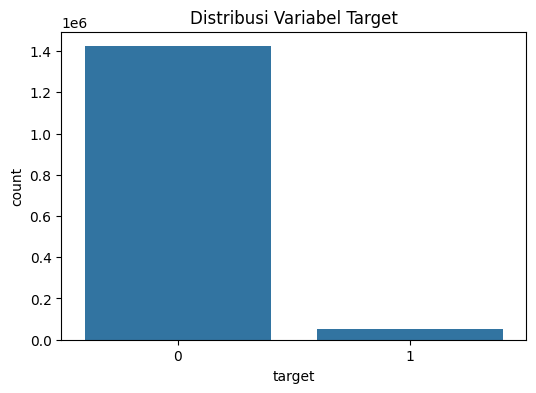

Distribusi kelas target:
target
0    0.966226
1    0.033774
Name: proportion, dtype: float64



In [7]:
# Visualisasi distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data)
plt.title('Distribusi Variabel Target')
plt.show()
print(f"Distribusi kelas target:\n{data['target'].value_counts(normalize=True)}\n")

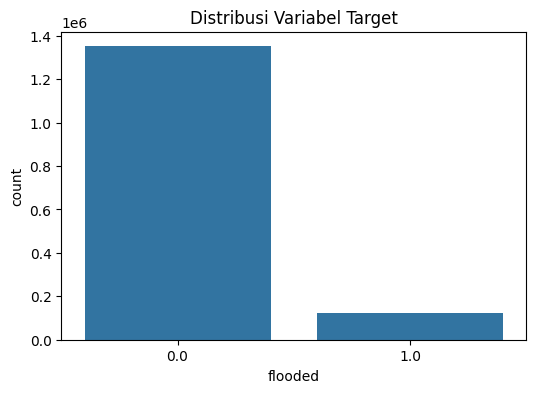

Distribusi kelas flooded:
flooded
0.0    0.917816
1.0    0.082184
Name: proportion, dtype: float64



In [15]:
# Visualisasi distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='flooded', data=data)
plt.title('Distribusi Variabel Target')
plt.show()
print(f"Distribusi kelas flooded:\n{data['flooded'].value_counts(normalize=True)}\n")

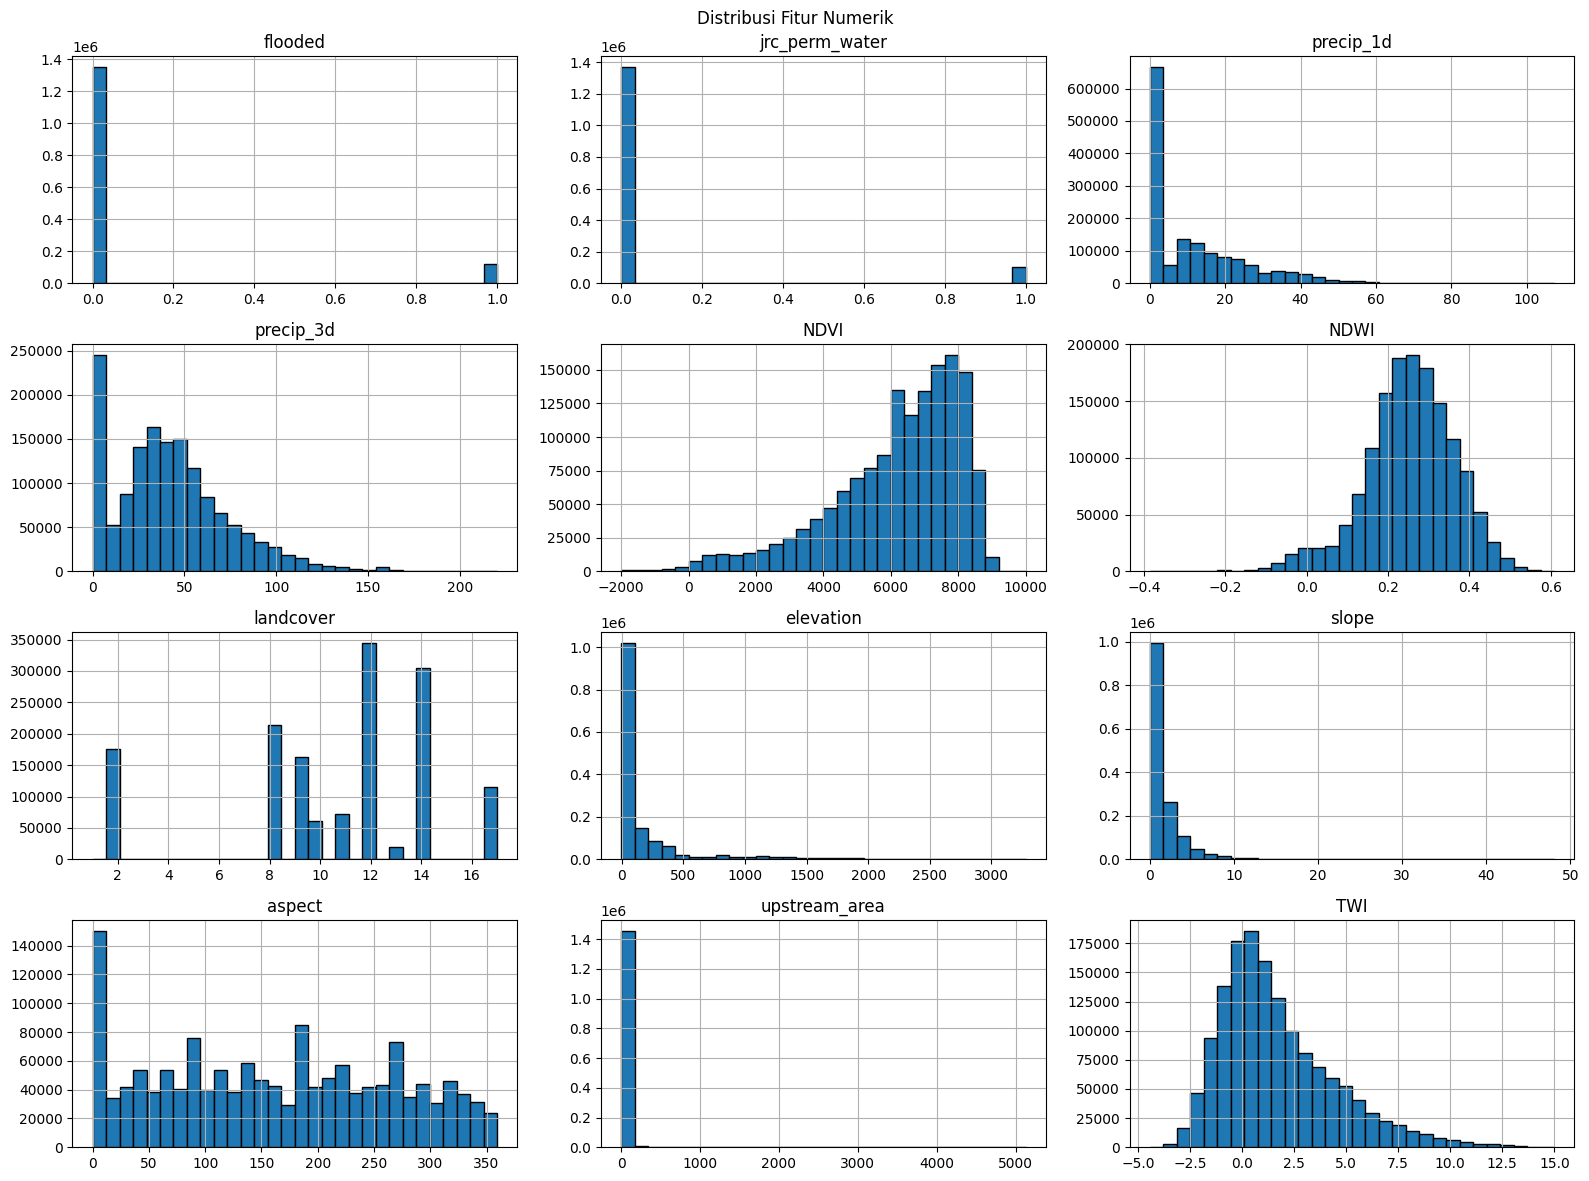

In [8]:
# Visualisasi distribusi beberapa fitur numerik
numerical_features = [
    'flooded',
    'jrc_perm_water',
    'precip_1d',
    'precip_3d',
    'NDVI',
    'NDWI',
    'landcover',
    'elevation',
    'slope',
    'aspect',
    'upstream_area',
    'TWI'
]

# Plot histogram
data.hist(column=numerical_features, bins=30, figsize=(16, 12), edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik')
plt.tight_layout()
plt.show()


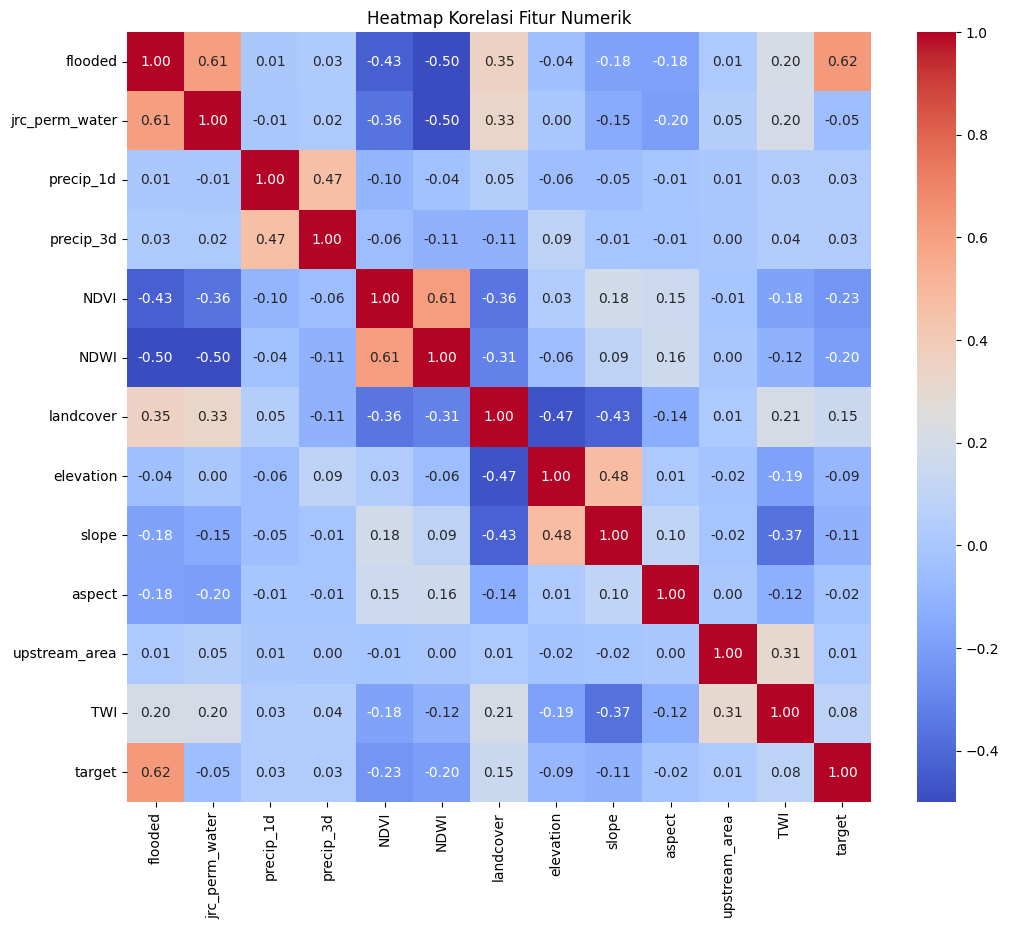

In [9]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_features + ['target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

In [10]:
if 'date' in data.columns:
    data = data.drop('date', axis=1)

if 'jrc_perm_water' in data.columns:
    data = data.drop('jrc_perm_water', axis=1)

if 'flooded' in data.columns:
    data = data.drop('flooded', axis=1)

In [11]:
data.head()

,lon,lat,precip_1d,precip_3d,NDVI,NDWI,landcover,elevation,slope,aspect,upstream_area,TWI,target
0,120.478677,-6.495942,9.645125,28.935376,6190.93062,-0.051446,17.0,0.0,0.116685,270.000000,0.031990,1.042098,0
1,120.480923,-6.495942,9.645125,28.935376,6190.93062,-0.051446,17.0,1.0,0.839713,236.480074,0.031990,1.042098,0
2,120.478677,-6.493697,9.645125,28.935376,6190.93062,0.028399,17.0,0.0,0.466730,270.000000,0.031990,1.042098,0
3,120.480923,-6.493697,9.645125,28.935376,6190.93062,0.028399,17.0,4.0,0.939179,240.413746,0.021235,0.258796,1
4,120.478677,-6.491451,9.645125,28.935376,6190.93062,-0.002506,17.0,0.0,0.583403,270.000000,0.031990,1.042098,0


In [12]:
# Memisahkan fitur (X) dan target (y)
X = data.drop('target', axis=1)
y = data['target']

In [13]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Ukuran X_train: {X_train.shape}, Ukuran y_train: {y_train.shape}")
print(f"Ukuran X_test: {X_test.shape}, Ukuran y_test: {y_test.shape}")
print(f"Distribusi target di y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Distribusi target di y_test:\n{y_test.value_counts(normalize=True)}\n")

Ukuran X_train: (1030509, 12), Ukuran y_train: (1030509,)
Ukuran X_test: (441647, 12), Ukuran y_test: (441647,)
Distribusi target di y_train:
target
0    0.966226
1    0.033774
Name: proportion, dtype: float64
Distribusi target di y_test:
target
0    0.966226
1    0.033774
Name: proportion, dtype: float64



--- Menerapkan SMOTE (Oversampling) ---
Ukuran X_train setelah SMOTE: (1991410, 12)
Distribusi target di y_train setelah SMOTE:
target
0    0.5
1    0.5
Name: proportion, dtype: float64



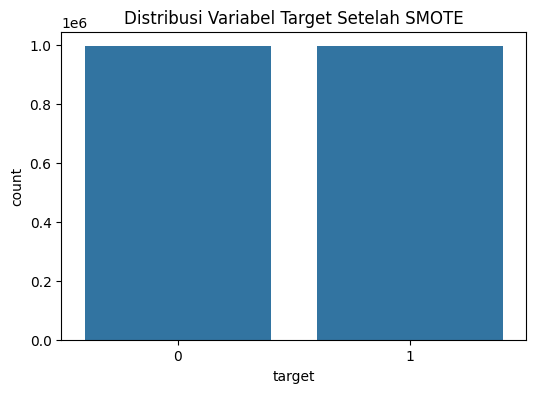

In [ ]:
# # --- 4. Oversampling (SMOTE) pada Data Latih ---
# print("--- Menerapkan SMOTE (Oversampling) ---")
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print(f"Ukuran X_train setelah SMOTE: {X_train_smote.shape}")
# print(f"Distribusi target di y_train setelah SMOTE:\n{y_train_smote.value_counts(normalize=True)}\n")

# plt.figure(figsize=(6, 4))
# sns.countplot(x=y_train_smote)
# plt.title('Distribusi Variabel Target Setelah SMOTE')
# plt.show()

--- Menerapkan RandomUnderSampler (Undersampling) ---
Ukuran X_train setelah Random Undersampling: (69608, 12)
Distribusi target di y_train setelah Random Undersampling:
target
0    0.5
1    0.5
Name: proportion, dtype: float64



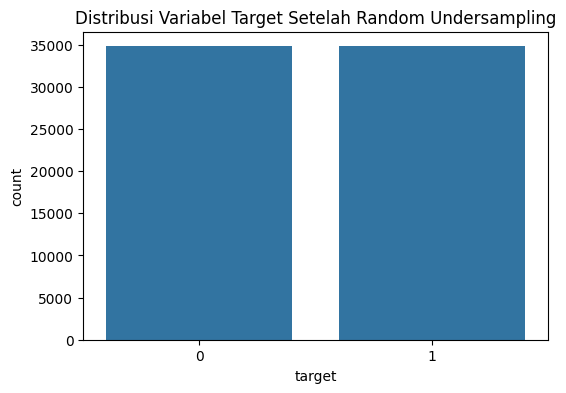

In [19]:
# --- 5. Undersampling (RandomUnderSampler) pada Data Latih ---
print("--- Menerapkan RandomUnderSampler (Undersampling) ---")
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print(f"Ukuran X_train setelah Random Undersampling: {X_train_rus.shape}")
print(f"Distribusi target di y_train setelah Random Undersampling:\n{y_train_rus.value_counts(normalize=True)}\n")

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_rus)
plt.title('Distribusi Variabel Target Setelah Random Undersampling')
plt.show()

In [18]:
# --- 6. Pelatihan Model XGBoost ---
def train_and_evaluate_xgboost(X_train_data, y_train_data, X_test_data, y_test_data, model_name="XGBoost"):
    """Melatih model XGBoost dan mengevaluasinya."""
    print(f"--- Melatih Model {model_name} ---")
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) # use_label_encoder=False untuk versi XGBoost > 1.3.0
    model.fit(X_train_data, y_train_data)

    print(f"\n--- Evaluasi Model {model_name} pada Data Uji ---")
    y_pred = model.predict(X_test_data)
    y_pred_proba = model.predict_proba(X_test_data)[:, 1] # Probabilitas untuk kelas positif

    print("Akurasi:", accuracy_score(y_test_data, y_pred))
    print("Precision:", precision_score(y_test_data, y_pred, zero_division=0))
    print("Recall:", recall_score(y_test_data, y_pred, zero_division=0))
    print("F1-Score:", f1_score(y_test_data, y_pred, zero_division=0))
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test_data, y_pred, zero_division=0))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test_data, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return model

In [14]:
# --- 4. Pelatihan Model XGBoost Classifier ---
def train_and_evaluate_xgbclassifier(X_train_data, y_train_data, X_test_data, y_test_data, model_name="XGBoost Classifier"):
    """Melatih model XGBClassifier dan mengevaluasinya, serta menampilkan proses training."""
    print(f"--- Melatih Model {model_name} ---")
    
    # Hitung scale_pos_weight untuk data tidak seimbang (opsional, tapi bisa membantu)
    # counter = y_train_data.value_counts()
    # scale_pos_weight_val = counter[0] / counter[1] if 1 in counter and counter[1] > 0 else 1
    # print(f"Calculated scale_pos_weight: {scale_pos_weight_val}")

    model = XGBClassifier(
        objective='binary:logistic', # Untuk klasifikasi biner
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        early_stopping_rounds=20,
        eval_metric=['logloss', 'error', 'auc'], # Metrik evaluasi untuk klasifikasi
        use_label_encoder=False, # Dianjurkan untuk XGBoost versi baru jika label sudah numerik (0,1)
        # scale_pos_weight=scale_pos_weight_val, # Gunakan jika ingin menangani imbalance
        n_jobs=-1
    )

    eval_set = [(X_train_data, y_train_data), (X_test_data, y_test_data)]
    
    print("\nMemulai proses fit model...")
    model.fit(
        X_train_data, y_train_data,
        eval_set=eval_set, 
        verbose=10 # Cetak log setiap 10 iterasi
    )
    
    print(f"\n--- Evaluasi Model {model_name} pada Data Uji ---")
    y_pred = model.predict(X_test_data)
    y_pred_proba = model.predict_proba(X_test_data)[:, 1]

    print("Akurasi:", accuracy_score(y_test_data, y_pred))
    print("Precision:", precision_score(y_test_data, y_pred, zero_division=0))
    print("Recall:", recall_score(y_test_data, y_pred, zero_division=0))
    print("F1-Score:", f1_score(y_test_data, y_pred, zero_division=0))
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test_data, y_pred, zero_division=0))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test_data, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Kelas 0', 'Kelas 1'], yticklabels=['Kelas 0', 'Kelas 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

    # Visualisasi learning curve
    results = model.evals_result()
    # Pilih salah satu metrik untuk learning curve, misal 'logloss' atau 'auc'
    metric_to_plot = 'logloss' # atau 'error' atau 'auc' (pastikan ada di eval_metric)
    
    if metric_to_plot in results['validation_0'] and metric_to_plot in results['validation_1']:
        epochs = len(results['validation_0'][metric_to_plot])
        x_axis = range(0, epochs)

        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(x_axis, results['validation_0'][metric_to_plot], label=f'Train {metric_to_plot.upper()}')
        ax.plot(x_axis, results['validation_1'][metric_to_plot], label=f'Test/Validation {metric_to_plot.upper()}')
        ax.legend()
        plt.ylabel(metric_to_plot.upper())
        plt.xlabel('Boosting Iteration')
        plt.title(f'XGBoost {metric_to_plot.upper()} Learning Curve - {model_name}')
        plt.show()
    else:
        print(f"Metrik '{metric_to_plot}' tidak ditemukan dalam hasil evaluasi. Periksa parameter 'eval_metric'.")
        print(f"Metrik yang tersedia untuk validation_0: {results['validation_0'].keys()}")


    return model

In [20]:
# --- 4. Pelatihan Model XGBoost Regressor ---
# Fungsi train_and_evaluate_xgbregressor
def train_and_evaluate_xgbregressor(X_train_data, y_train_data, X_test_data, y_test_data, model_name="XGBoost Regressor"):
    """Melatih model XGBRegressor dan mengevaluasinya, serta menampilkan proses training."""
    print(f"--- Melatih Model {model_name} ---")
    
    # Inisialisasi XGBRegressor
    # eval_metric bisa 'rmse', 'mae', dll.
    model = XGBRegressor(
        objective='reg:squarederror', # Tujuan umum untuk regresi
        n_estimators=200,             # Jumlah pohon (bisa di-tune)
        learning_rate=0.05,           # Learning rate (bisa di-tune)
        max_depth=5,                  # Kedalaman maksimum pohon (bisa di-tune)
        subsample=0.8,                # Subsample ratio of the training instance
        colsample_bytree=0.8,         # Subsample ratio of columns when constructing each tree
        random_state=42,
        eval_metric="rmse",
        early_stopping_rounds=20,
        n_jobs=-1                     # Gunakan semua core CPU
    )

    # Menyiapkan eval_set untuk memantau kinerja pada data tes selama pelatihan
    eval_set = [(X_train_data, y_train_data), (X_test_data, y_test_data)]
    
    print("\nMemulai proses fit model...")
    # Melatih model dengan early stopping dan verbose
    # early_stopping_rounds: Menghentikan training jika metrik pada eval_set tidak membaik selama N ronde.
    # verbose: Menampilkan metrik evaluasi. verbose=10 berarti setiap 10 ronde.
    model.fit(
        X_train_data, y_train_data,
        eval_set=eval_set,
        # eval_metric="rmse",  # Metrik untuk evaluasi dan early stopping
        # early_stopping_rounds=20, # Hentikan jika tidak ada peningkatan setelah 20 ronde
        verbose=10 # Cetak log setiap 10 iterasi. Setel ke True untuk setiap iterasi atau False untuk tidak ada output.
    )
    
    print(f"\n--- Evaluasi Model {model_name} pada Data Uji ---")
    y_pred = model.predict(X_test_data)

    # Menghitung metrik regresi
    mse = mean_squared_error(y_test_data, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_data, y_pred)
    r2 = r2_score(y_test_data, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}\n")

    # Visualisasi hasil learning curve jika verbose=True atau angka
    results = model.evals_result()
    epochs = len(results['validation_0']['rmse'])
    x_axis = range(0, epochs)

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(x_axis, results['validation_0']['rmse'], label='Train RMSE')
    ax.plot(x_axis, results['validation_1']['rmse'], label='Test/Validation RMSE')
    ax.legend()
    plt.ylabel('RMSE')
    plt.xlabel('Boosting Iteration')
    plt.title(f'XGBoost RMSE Learning Curve - {model_name}')
    plt.show()
    
    # Visualisasi Prediksi vs Aktual
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test_data, y_pred, alpha=0.5)
    plt.plot([y_test_data.min(), y_test_data.max()], [y_test_data.min(), y_test_data.max()], 'k--', lw=2) # Garis y=x
    plt.xlabel('Aktual')
    plt.ylabel('Prediksi')
    plt.title(f'Prediksi vs. Nilai Aktual - {model_name}')
    plt.axis('equal') # Pastikan skala sumbu x dan y sama
    plt.axis('square')
    plt.tight_layout()
    plt.show()

    return model

--- Melatih Model XGBoost (Data Asli) ---

Memulai proses fit model...
[0]	validation_0-logloss:0.13614	validation_0-error:0.03377	validation_0-auc:0.94460	validation_1-logloss:0.13608	validation_1-error:0.03377	validation_1-auc:0.94531


f:\dataE\anaconda\envs\tf-gpu\lib\site-packages\xgboost\callback.py:386: UserWarning: [18:52:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[10]	validation_0-logloss:0.09831	validation_0-error:0.03377	validation_0-auc:0.96629	validation_1-logloss:0.09840	validation_1-error:0.03377	validation_1-auc:0.96596
[20]	validation_0-logloss:0.08524	validation_0-error:0.03337	validation_0-auc:0.96810	validation_1-logloss:0.08534	validation_1-error:0.03338	validation_1-auc:0.96777
[30]	validation_0-logloss:0.07868	validation_0-error:0.03227	validation_0-auc:0.96939	validation_1-logloss:0.07883	validation_1-error:0.03238	validation_1-auc:0.96896
[40]	validation_0-logloss:0.07456	validation_0-error:0.03078	validation_0-auc:0.97063	validation_1-logloss:0.07476	validation_1-error:0.03083	validation_1-auc:0.97013
[50]	validation_0-logloss:0.07185	validation_0-error:0.02979	validation_0-auc:0.97166	validation_1-logloss:0.07211	validation_1-error:0.02983	validation_1-auc:0.97102
[60]	validation_0-logloss:0.07000	validation_0-error:0.02897	validation_0-auc:0.97248	validation_1-logloss:0.07033	validation_1-error:0.02900	validation_1-auc:0.9717

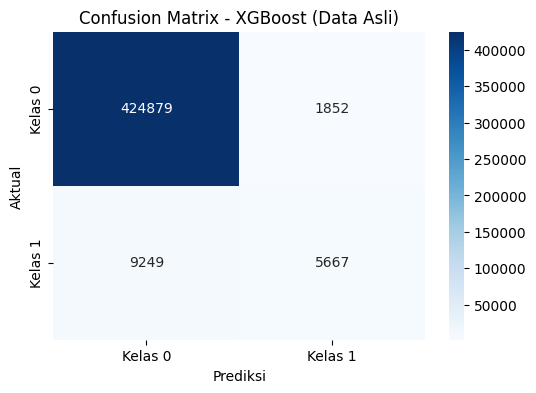

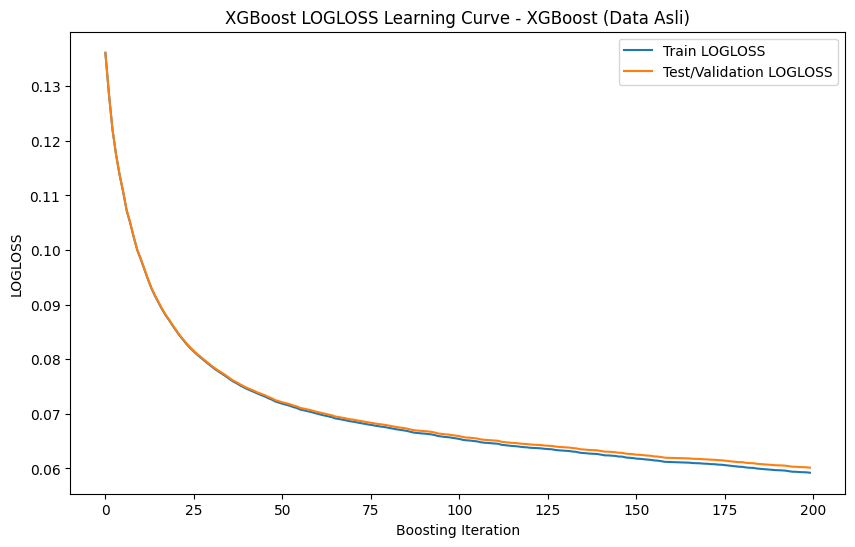

In [ ]:
# Model 1: XGBoost pada data asli (tidak seimbang, sudah di-scale)
model_original = train_and_evaluate_xgbclassifier(X_train, y_train, X_test, y_test, "XGBoost (Data Asli)")

# # Model 2: XGBoost pada data yang di-oversample (SMOTE)
# model_smote = train_and_evaluate_xgboost(X_train_smote, y_train_smote, X_test, y_test, "XGBoost (SMOTE)")

--- Melatih Model XGBoost (Random Undersampler) ---

Memulai proses fit model...
[0]	validation_0-logloss:0.66066	validation_0-error:0.11029	validation_0-auc:0.94342	validation_1-logloss:0.66102	validation_1-error:0.13178	validation_1-auc:0.94257


f:\dataE\anaconda\envs\tf-gpu\lib\site-packages\xgboost\callback.py:386: UserWarning: [19:01:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[10]	validation_0-logloss:0.46237	validation_0-error:0.08679	validation_0-auc:0.96029	validation_1-logloss:0.46862	validation_1-error:0.12373	validation_1-auc:0.95856
[20]	validation_0-logloss:0.35712	validation_0-error:0.08420	validation_0-auc:0.96260	validation_1-logloss:0.37026	validation_1-error:0.12023	validation_1-auc:0.96101
[30]	validation_0-logloss:0.29639	validation_0-error:0.08268	validation_0-auc:0.96446	validation_1-logloss:0.31630	validation_1-error:0.11980	validation_1-auc:0.96271
[40]	validation_0-logloss:0.26141	validation_0-error:0.08062	validation_0-auc:0.96630	validation_1-logloss:0.28636	validation_1-error:0.11784	validation_1-auc:0.96442
[50]	validation_0-logloss:0.23733	validation_0-error:0.07775	validation_0-auc:0.96907	validation_1-logloss:0.26533	validation_1-error:0.11417	validation_1-auc:0.96711
[60]	validation_0-logloss:0.22169	validation_0-error:0.07531	validation_0-auc:0.97102	validation_1-logloss:0.25169	validation_1-error:0.11124	validation_1-auc:0.9689

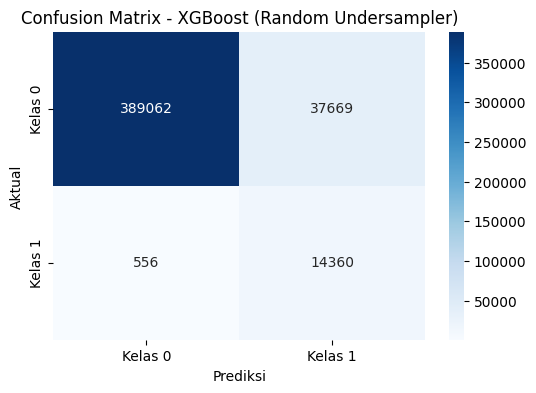

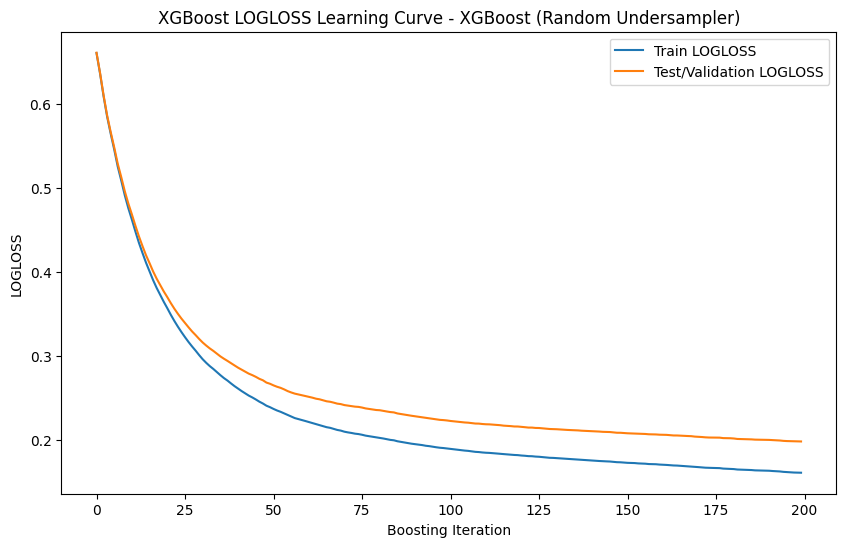

In [21]:
# # Model 3: XGBoost pada data yang di-undersample (RandomUnderSampler)
model_rus = train_and_evaluate_xgbclassifier(X_train_rus, y_train_rus, X_test, y_test, "XGBoost (Random Undersampler)")

In [ ]:
# # Model 1: XGBoost pada data asli (tidak seimbang, sudah di-scale)
# model_original_regressor = train_and_evaluate_xgbregressor(X_train, y_train, X_test, y_test, "XGBoost (Data Asli)")

# # Model 2: XGBoost pada data yang di-oversample (SMOTE)
# model_smote_regressor = train_and_evaluate_xgbregressor(X_train_smote, y_train_smote, X_test, y_test, "XGBoost (SMOTE)")

# # Model 3: XGBoost pada data yang di-undersample (RandomUnderSampler)
# model_rus_regressor = train_and_evaluate_xgbregressor(X_train_nm, y_train_nm, X_test, y_test, "XGBoost (Random Undersampler)")

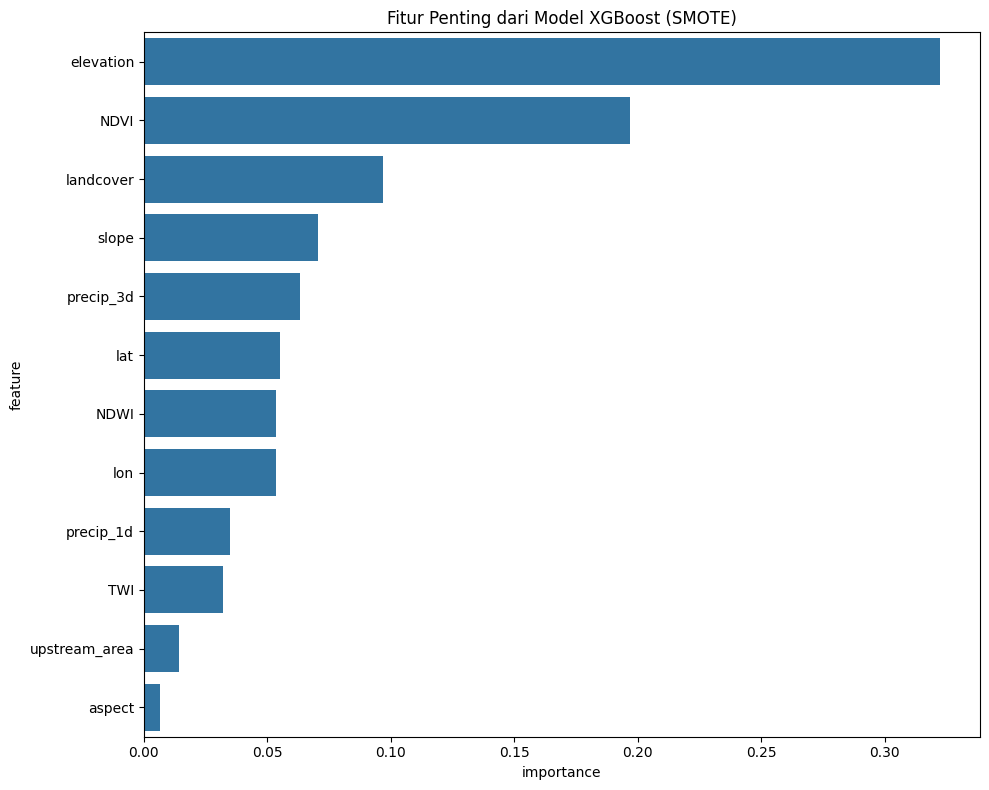


--- Fitur Penting (SMOTE Model) ---
          feature  importance
7       elevation    0.322479
4            NDVI    0.196966
6       landcover    0.096947
8           slope    0.070529
3       precip_3d    0.063014
1             lat    0.055115
5            NDWI    0.053683
0             lon    0.053630
2       precip_1d    0.034905
11            TWI    0.031992
10  upstream_area    0.014060
9          aspect    0.006680

--- Selesai ---


In [ ]:
# --- 7. Analisis Fitur Penting (Feature Importance) dari salah satu model ---
# Contoh menggunakan model yang dilatih dengan DATA ASLI
if hasattr(model_original, 'feature_importances_'):
    importances = model_original.feature_importances_
    feature_names = X.columns # Gunakan nama kolom asli
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.title('Fitur Penting dari Model XGBoost (SMOTE)')
    plt.tight_layout()
    plt.show()
    print("\n--- Fitur Penting (SMOTE Model) ---")
    print(feature_importance_df)

print("\n--- Selesai ---")